**SIN-393 - Introdução à Visão Computacional (2022-2)**

# Aula 01 - Imagens digitais

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importando as bibliotecas necessárias
---

In [1]:
# Biblioteca padrão do Python
import os

# Módulos externos
import numpy as np
from skimage import data, color, util, io, transform
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib notebook

## Carregando uma imagem
---
* Carregando uma imagem em níveis de cinza diretamente da biblioteca scikit-image.

In [2]:
img = data.coins()

# Imprimindo (uma parte) da imagem, para análise.
print(img)

[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]


## Plotando a imagem
---

<IPython.core.display.Javascript object>


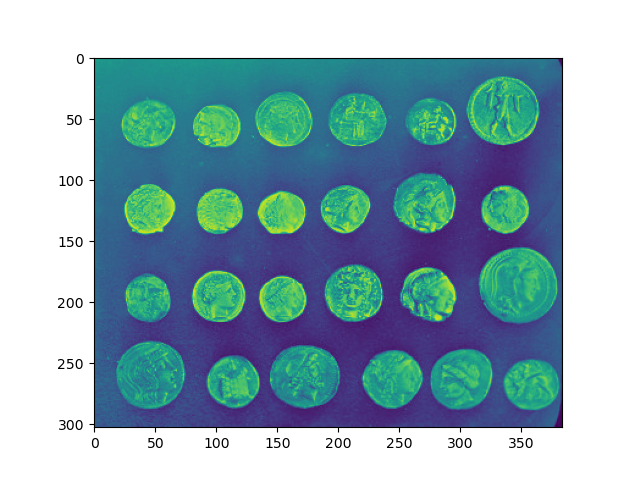

In [3]:
plt.figure()

plt.imshow(img)

plt.show()

* Quando plotamos uma imagem em níveis de cinza usando o Matplotlib, a imagem é mostrada usando um mapa de cores (pseudocores). 
    * Ou seja, cada nível de cinza é mapeado para uma cor falsa.
* Para que o Matplotlib mostre os níveis de cinza é necessário definir, explicitamente, o mapa de cores 'gray'.

<IPython.core.display.Javascript object>


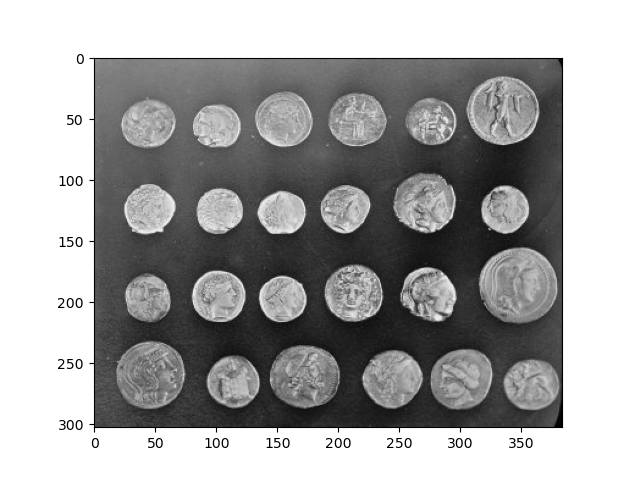

In [4]:
plt.figure()

# Para visualizar imagens de intensidade em níveis de cinza usar o mapa de cores 'gray'.
plt.imshow(img, cmap='gray')

plt.show()

## Informações sobre a imagem
---

* Algumas informações importantes sobre as imagens podem ser obtidas.

In [5]:
# O tipo da váriavel que armazena a imagem.
print(type(img))

<class 'numpy.ndarray'>


In [6]:
print(f'Tamanho da imagem: {img.shape}')
print(f'Número de dimensões: {img.ndim}')
print(f'Tipo de dados: {img.dtype}')
print()
print(f'Valor mínimo: {img.min()}')
print(f'Valor máximo: {img.max()}')
print(f'Média da imagem: {img.mean():.4f}')
print(f'Desvio padrão da imagem: {img.std():.4f}')

Tamanho da imagem: (303, 384)
Número de dimensões: 2
Tipo de dados: uint8

Valor mínimo: 1
Valor máximo: 252
Média da imagem: 96.8555
Desvio padrão da imagem: 52.8798


## Histograma da imagem
---
* O histograma de uma imagem consiste na contagem das ocorrências dos valores de intensidade presentes na imagem. 
* O histograma costuma ser visualizado por meio de um gráfico de barras (ou similar)
    * O número de barras corresponde ao número de possíveis valores de intensidade (faixa dinâmica - profundidade da imagem)
    * O tamanho de cada barra corresponde ao número de ocorrências do valor na imagem.

<IPython.core.display.Javascript object>


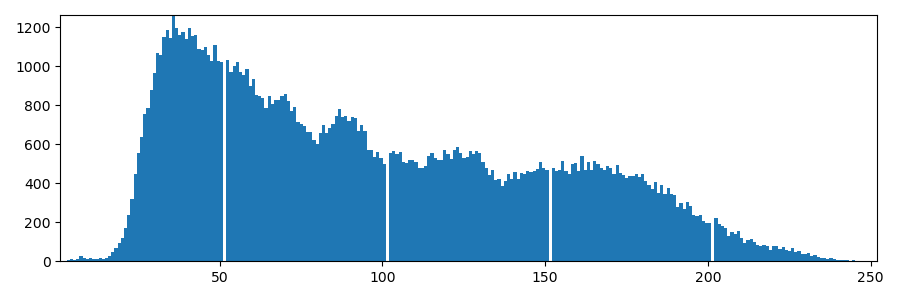

In [7]:
plt.figure(figsize=(9, 3))

# O método 'ravel' converte algum ndarray em um arranho 1D.
# O número de bins foi definido em 256 pois o tipo de dados da imagem é uint8 (inteiro de 8 bits sem sinal).
plt.hist(img.ravel(), bins=256)
plt.autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()
plt.show()

## Carregando uma imagem RGB
---
* Carregar uma imagem colorida (RGB) diretamente a partir da biblioteca scikit-image.

In [8]:
img_rgb = data.astronaut()

print(img_rgb)

[[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  ...
  [127 120 115]
  [120 117 106]
  [125 119 110]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  ...
  [127 118 112]
  [124 115 108]
  [121 116 105]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  ...
  [128 120 117]
  [126 116 112]
  [124 114 109]]

 ...

 [[186 170 176]
  [186 170 177]
  [183 168 170]
  ...
  [  0   0   0]
  [  0   0   1]
  [  0   0   0]]

 [[183 169 170]
  [182 167 171]
  [185 164 176]
  ...
  [  0   0   1]
  [  1   1   1]
  [  0   0   0]]

 [[184 167 172]
  [183 165 169]
  [180 162 171]
  ...
  [  0   0   0]
  [  1   1   1]
  [  0   0   0]]]


<IPython.core.display.Javascript object>


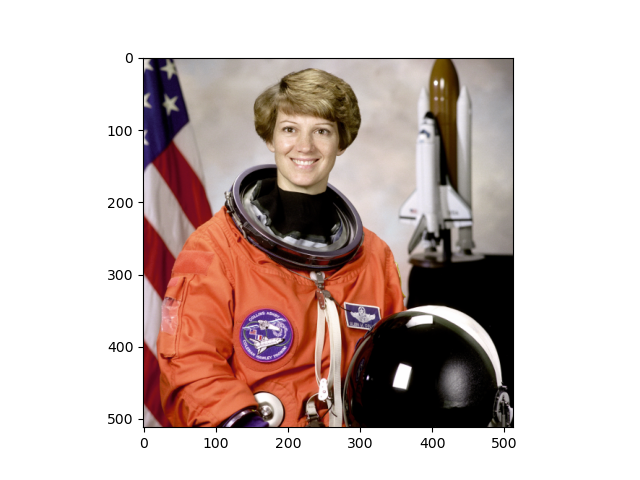

In [9]:
plt.figure()

plt.imshow(img_rgb)

plt.show()

### Informações sobre a imagem
* Vamos criar uma função para imprimir as informações sobre a imagem.

In [10]:
def print_info(img):
    print(f'Tamanho da imagem: {img.shape}')
    print(f'Número de dimensões: {img.ndim}')
    print(f'Tipo de dados: {img.dtype}')
    print()
    print(f'Valor mínimo: {img.min()}')
    print(f'Valor máximo: {img.max()}')
    print(f'Média da imagem: {img.mean():.4f}')
    print(f'Desvio padrão da imagem: {img.std():.4f}')

* Agora não é mais preciso repetir o código novamente
    * Apenas chamamos a função passando a variável que armazena a imagem como argumento.

In [11]:
print_info(img_rgb)

Tamanho da imagem: (512, 512, 3)
Número de dimensões: 3
Tipo de dados: uint8

Valor mínimo: 0
Valor máximo: 255
Média da imagem: 114.5990
Desvio padrão da imagem: 81.2304


* Uma imagem colorida RGB é composta por 3 canais, cada canal armazena informações sobre uma cor, Vermelho, Verde e Azul.

In [12]:
# Canal Vermelho (Red)
im_r = img_rgb[:,:,0]
# Canal Verde (Green)
im_g = img_rgb[:,:,1]
# Canal Azul (Blue)
im_b = img_rgb[:,:,2]

* Usando o Matplotlib é possível mostrar múltiplos plots na mesma figura.

<IPython.core.display.Javascript object>


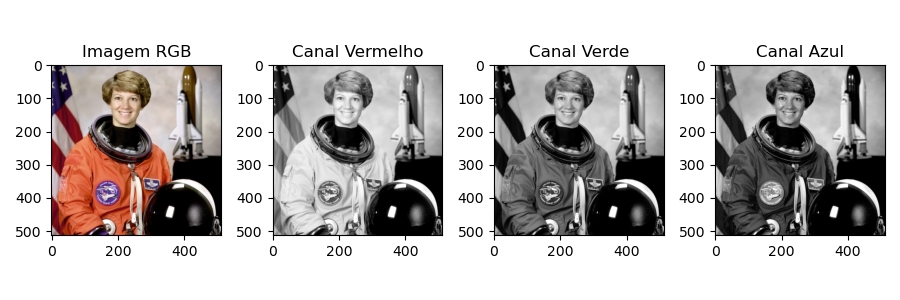

In [13]:
plt.figure(figsize=(9, 3))

plt.subplot(1,4,1)
plt.imshow(img_rgb, cmap='gray')
plt.title('Imagem RGB')
plt.subplot(1,4,2)
plt.imshow(im_r, cmap='gray')
plt.title('Canal Vermelho')
plt.subplot(1,4,3)
plt.imshow(im_g, cmap='gray')
plt.title('Canal Verde')
plt.subplot(1,4,4)
plt.imshow(im_b, cmap='gray')
plt.title('Canal Azul')

plt.tight_layout()
plt.show()

* Plotando os histogramas das imagens. 
    * Usando uma forma diferente de realizar múltiplos plots.

<IPython.core.display.Javascript object>


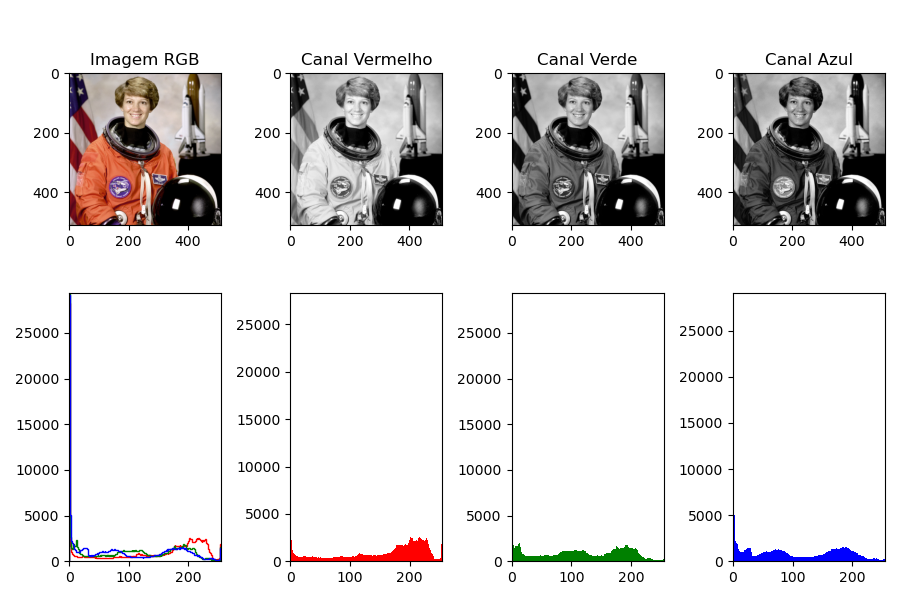

In [14]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(9,6))

ax1.imshow(img_rgb)
ax1.set_title('Imagem RGB')

ax2.imshow(im_r, cmap='gray')
ax2.set_title('Canal Vermelho')

ax3.imshow(im_g, cmap='gray')
ax3.set_title('Canal Verde')

ax4.imshow(im_b, cmap='gray')
ax4.set_title('Canal Azul')

ax5.hist(im_r.flatten(), 256, color='red', histtype='step')
ax5.hist(im_g.flatten(), 256, color='green', histtype='step')
ax5.hist(im_b.flatten(), 256, color='blue', histtype='step')
ax5.autoscale(enable=True, axis='both', tight=True)

ax6.hist(im_r.flatten(), 256, color='red')
ax6.autoscale(enable=True, axis='both', tight=True)

ax7.hist(im_g.flatten(), 256, color='green')
ax7.autoscale(enable=True, axis='both', tight=True)

ax8.hist(im_b.flatten(), 256, color='blue')
ax8.autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()
plt.show()

### Convertendo uma imagem RGB para níveis de cinza

In [15]:
img_rgb_gray = color.rgb2gray(img_rgb)

* Plotando a imagem juntamente com a barra de cores e sem as informações de eixos.

<IPython.core.display.Javascript object>


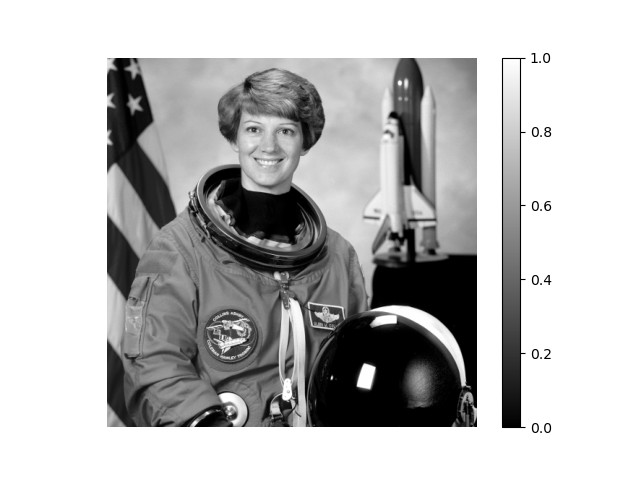

In [16]:
plt.figure()

plt.imshow(img_rgb_gray, cmap='gray')
# Mostra a barra de cores
plt.colorbar()
# Omite informações dos eixos
plt.axis('off')

plt.show()

## Carregando imagens a partir de arquivos
---
* Nos exemplos anteriores usamos imagens fornecidas pela biblioteca
* Porém na maior parte das vezes precisamos processar imagens armazenadas localmente em arquivos.
* Aqui iremos carregar uma imagem que está armazenada no arquivo 'heron_720_gray.png' armazenada na pasta 'data/images/'.

In [17]:
img_gray = plt.imread('./data/images/heron_720_gray.png')

In [18]:
print_info(img_gray)

Tamanho da imagem: (960, 720)
Número de dimensões: 2
Tipo de dados: float32

Valor mínimo: 0.003921568859368563
Valor máximo: 1.0
Média da imagem: 0.4537
Desvio padrão da imagem: 0.2011


<IPython.core.display.Javascript object>


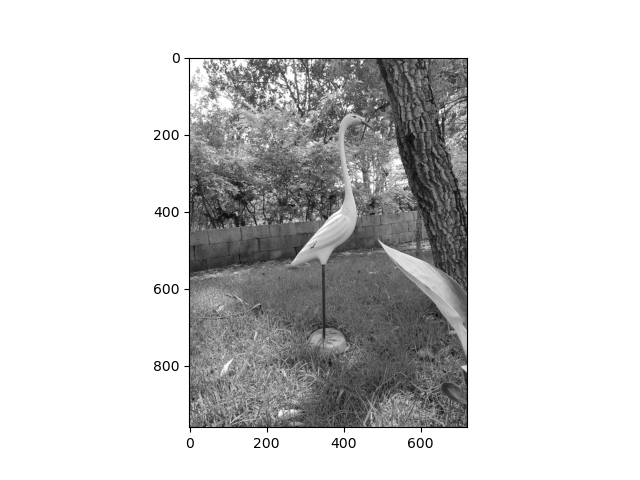

In [19]:
plt.figure()

plt.imshow(img_gray, cmap='gray')

plt.show()

* Agora vamos carregar uma imagem RGB 'heron_720.png' a partir de algum arquivo armazenado localmente.

In [20]:
img_rgb = plt.imread('./data/images/heron_720.png')

In [21]:
print_info(img_rgb)

Tamanho da imagem: (960, 720, 3)
Número de dimensões: 3
Tipo de dados: float32

Valor mínimo: 0.0
Valor máximo: 1.0
Média da imagem: 0.3890
Desvio padrão da imagem: 0.2308


<IPython.core.display.Javascript object>


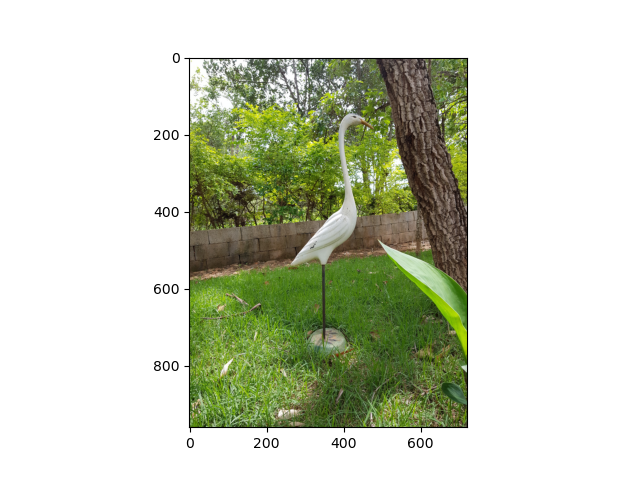

In [22]:
plt.figure()

plt.imshow(img_rgb)

plt.show()

## Salvando imagens em arquivos
---

In [23]:
# Usando o Matplotlib
plt.imsave('./data/images/heron_720_gray_2.png', img_gray, cmap='gray')

# Usando o Scikit-image
io.imsave('./data/images/heron_720_gray_3.png', img_gray)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [24]:
plt.imsave('./data/images/heron_720_2.png', img_rgb)

* Verifique na pasta se os arquivos foram criados.

## Tipos de dados da imagem
---

### Imagem em níveis de cinza

In [25]:
print(img_gray.dtype)

float32


* Convertendo imagem para inteiro de 8 bits sem sinal. 2^8 = 256 valores entre 0 e 255

In [26]:
img_gray_uint8 = util.img_as_ubyte(img_gray)
print_info(img_gray_uint8)

Tamanho da imagem: (960, 720)
Número de dimensões: 2
Tipo de dados: uint8

Valor mínimo: 1
Valor máximo: 255
Média da imagem: 115.6944
Desvio padrão da imagem: 51.2746


* Convertendo para float. Valores entre 0.0 e 1.0

In [27]:
img_gray_float = util.img_as_float(img_gray_uint8)
print_info(img_gray_float)

Tamanho da imagem: (960, 720)
Número de dimensões: 2
Tipo de dados: float64

Valor mínimo: 0.00392156862745098
Valor máximo: 1.0
Média da imagem: 0.4537
Desvio padrão da imagem: 0.2011


### Imagem RGB

In [28]:
print(img_rgb.dtype)

float32


In [29]:
img_rgb_uint8 = util.img_as_ubyte(img_rgb)
print_info(img_rgb_uint8)

Tamanho da imagem: (960, 720, 3)
Número de dimensões: 3
Tipo de dados: uint8

Valor mínimo: 0
Valor máximo: 255
Média da imagem: 99.2038
Desvio padrão da imagem: 58.8640


In [30]:
img_rgb_float = util.img_as_float(img_rgb_uint8)
print_info(img_rgb_float)

Tamanho da imagem: (960, 720, 3)
Número de dimensões: 3
Tipo de dados: float64

Valor mínimo: 0.0
Valor máximo: 1.0
Média da imagem: 0.3890
Desvio padrão da imagem: 0.2308


## Operações aritméticas
---

### Mascaramento

In [31]:
# Informações sobre a image de entrada
print_info(img_gray)

Tamanho da imagem: (960, 720)
Número de dimensões: 2
Tipo de dados: float32

Valor mínimo: 0.003921568859368563
Valor máximo: 1.0
Média da imagem: 0.4537
Desvio padrão da imagem: 0.2011


In [32]:
# Número de linhas
num_l = img_gray.shape[0]

# Número de colunas
num_c = img_gray.shape[1]

In [33]:
# Cirando uma máscara binária
img_mask = np.zeros([num_l, num_c], dtype=float)
img_mask[100:300, 300:500] = 1.

In [34]:
img_rdi = img_gray * img_mask

<IPython.core.display.Javascript object>


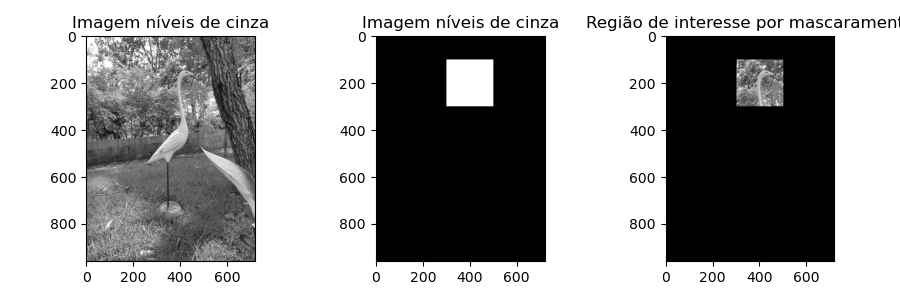

In [35]:
plt.figure(figsize=(9,3))

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagem níveis de cinza')

plt.subplot(1,3,2)
plt.imshow(img_mask, cmap='gray')
plt.title('Imagem níveis de cinza')

plt.subplot(1,3,3)
plt.imshow(img_rdi, cmap='gray')
plt.title('Região de interesse por mascaramento')

plt.tight_layout()
plt.show()

## Transformações geométricas
---

### Recorte (*crop*)

In [36]:
# Recorta uma região retangular. As linhas entre 100 e 220 (120 linhas) e as colunas entre 50 e 140 (90 colunas)
img_crop_1 = img_gray[100:220, 50:140]

In [37]:
print(img_crop_1.shape)

(120, 90)


In [38]:
# Recorta a quadrante superior direito da imagem (independente do tamanho da imagem)

# Número de linhas
num_l = img_gray.shape[0]
# Número de colunas
num_c = img_gray.shape[1]

img_crop_2 = img_gray[0:num_l//2, num_c//2:]

In [39]:
print(img_crop_2.shape)

(480, 360)


In [40]:
# Recorta a região central da imagem com tamanho de 2/4 do tamanho original
img_crop_3 = img_gray[num_l//4:-num_l//4, num_c//4:-num_c//4]

<IPython.core.display.Javascript object>


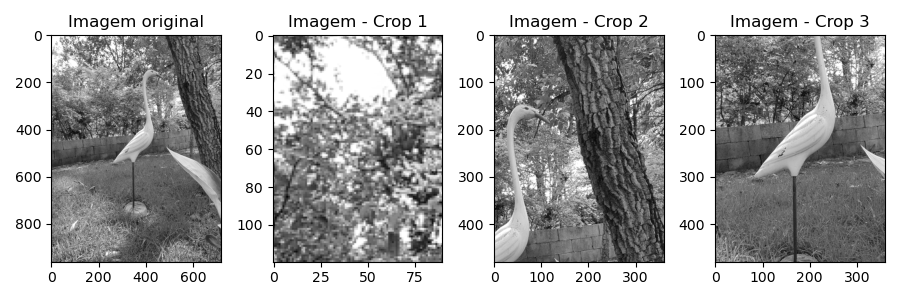

In [41]:
plt.figure(figsize=(9, 3))

plt.subplot(1,4,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagem original')

plt.subplot(1,4,2)
plt.imshow(img_crop_1, cmap='gray')
plt.title('Imagem - Crop 1')

plt.subplot(1,4,3)
plt.imshow(img_crop_2, cmap='gray')
plt.title('Imagem - Crop 2')

plt.subplot(1,4,4)
plt.imshow(img_crop_3, cmap='gray')
plt.title('Imagem - Crop 3')

plt.tight_layout()
plt.show()

### Atribuição de valores usando fatiamento

In [42]:
# Número de linhas
num_l = img_gray.shape[0]
# Número de colunas
num_c = img_gray.shape[1]

im_atr = img_gray_uint8.copy() # Força a cópia da imagem
im_atr2 = img_gray_uint8.copy() # Força a cópia da imagem

im_atr[100:200, num_c//2:] = 255

im_atr2[100:200, num_c-255:num_c] = np.arange(255)

<IPython.core.display.Javascript object>


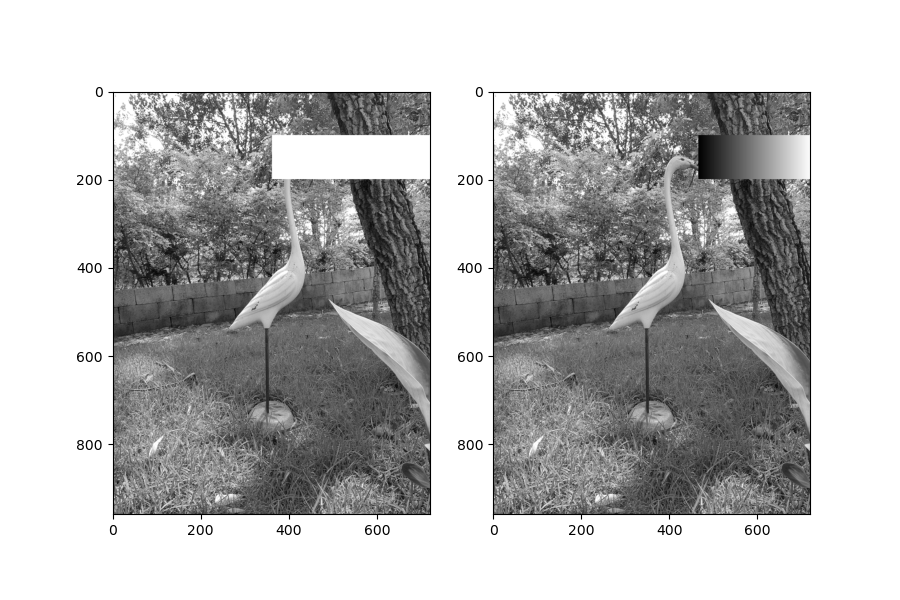

In [43]:
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(im_atr, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(im_atr2, cmap='gray')

plt.show()

### Espelhamento

In [44]:
# Espelhamento vertical
img_esp_v = np.flipud(img_gray)

# Espelhamento horizontal
img_esp_h = np.fliplr(img_gray)

# Espelhamento vertical seguido de horizontal
img_esp_vh = np.fliplr(img_esp_v)

<IPython.core.display.Javascript object>


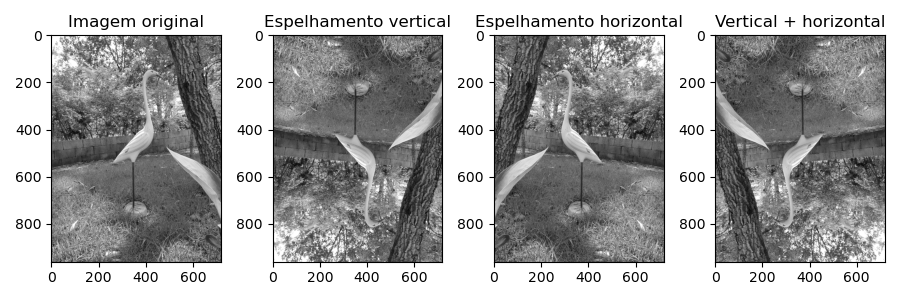

In [45]:
plt.figure(figsize=(9, 3))

plt.subplot(1,4,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagem original')

plt.subplot(1,4,2)
plt.imshow(img_esp_v, cmap='gray')
plt.title('Espelhamento vertical')

plt.subplot(1,4,3)
plt.imshow(img_esp_h, cmap='gray')
plt.title('Espelhamento horizontal')

plt.subplot(1,4,4)
plt.imshow(img_esp_vh, cmap='gray')
plt.title('Vertical + horizontal')

plt.tight_layout()
plt.show()

### Rotação

In [46]:
img_rot_45 = transform.rotate(img_gray, 45)
print_info(img_rot_45)

Tamanho da imagem: (960, 720)
Número de dimensões: 2
Tipo de dados: float32

Valor mínimo: 0.0
Valor máximo: 1.0
Média da imagem: 0.3530
Desvio padrão da imagem: 0.2365


In [47]:
img_rot_45r = transform.rotate(img_gray, 45, resize=True)
print_info(img_rot_45r)

Tamanho da imagem: (1188, 1188)
Número de dimensões: 2
Tipo de dados: float32

Valor mínimo: 0.0
Valor máximo: 1.0
Média da imagem: 0.2222
Desvio padrão da imagem: 0.2624


<IPython.core.display.Javascript object>


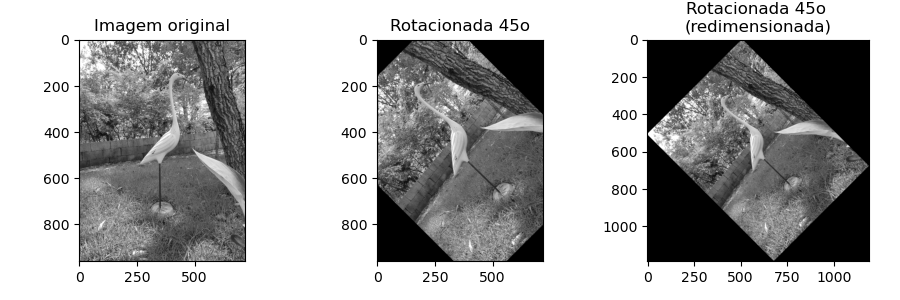

In [48]:
plt.figure(figsize=(9, 3))

plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Imagem original')

plt.subplot(1,3,2)
plt.imshow(img_rot_45, cmap='gray')
plt.title('Rotacionada 45o')

plt.subplot(1,3,3)
plt.imshow(img_rot_45r, cmap='gray')
plt.title('Rotacionada 45o \n(redimensionada)')

plt.tight_layout()
plt.show()

## Carregando e processando arquivos em lote
---
* Uma forma simples de processar lotes de imagens armazenadas em uma pasta.
    * Obs.: O módulo 'glob' fornece recursos mais avançados para este tipo de tarefa.

In [49]:
path_to_folder = './data/images'

# Lista com todos os arquivos (e sub-pastas) dentro da pasta.
file_list_ = os.listdir(path_to_folder)
print(file_list_)

['cylinder_720.png', 'cylinder_720_gray.png', 'heron_720.png', 'heron_720_2.png', 'heron_720_gray.png', 'heron_720_gray_2.png', 'heron_720_gray_3.png', 'paisagem02_gray.png', 'paisagem_02.png', 'sidewalk01_512x512.png', 'temp', 'temp.txt']


In [50]:
# Filtrando apenas arquivos de imagens (.jpg, .jpeg, .png)
ext_list = ['jpg', 'jpeg', 'png']
file_list = []
for filename in file_list_:
    # Ignora sub-pastas e arquivos que não sejam de imagens (.jpg, .jpeg, .png)
    if os.path.isfile(os.path.join(path_to_folder, filename)) and filename.split('.')[-1] in ext_list:
        file_list.append(filename)

print(file_list)

['cylinder_720.png', 'cylinder_720_gray.png', 'heron_720.png', 'heron_720_2.png', 'heron_720_gray.png', 'heron_720_gray_2.png', 'heron_720_gray_3.png', 'paisagem02_gray.png', 'paisagem_02.png', 'sidewalk01_512x512.png']


In [51]:
dest_path = './data/images_ok'

if not os.path.exists(dest_path):
    # Se a pasta não existir, então criar a pasta de destino.
    os.makedirs(dest_path)

In [52]:
for filename in file_list:
    # Percorre os elementos na lista.
    
    # Abre a imagem...
    img = plt.imread(os.path.join(path_to_folder, filename))
    
    # Realiza algum tipo de processamento...
    # Neste caso, recortar o centro da imagem!
    img_proc = img[img.shape[0]//3:-img.shape[0]//3, img.shape[1]//3:-img.shape[1]//3]
    
    # Salva a imagem na pasta...
    ### plt.imsave(os.path.join(dest_path, filename), img_proc)
    io.imsave(os.path.join(dest_path, filename), img_proc)

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

### Criando um mosaico com as imagens

10 images


<IPython.core.display.Javascript object>


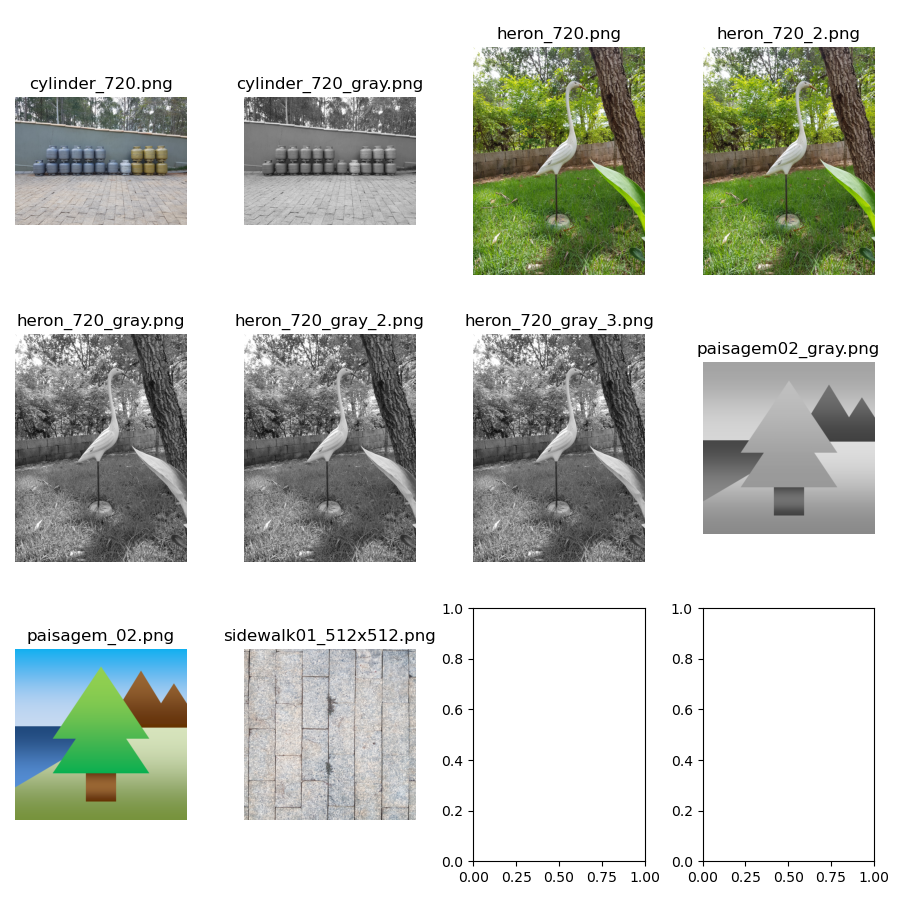

In [53]:
# Número de imagens na pasta.
num_images = len(file_list)
print(f'{num_images} images')

# Mosaico com 4 colunas e teto(N/4) linhas
fig, ax  = plt.subplots(int(np.ceil(num_images/4)), 4, figsize=(9, 9))
for i, filename in enumerate(file_list):
    
    # Carrega a imagem
    img = plt.imread(os.path.join(path_to_folder, filename))
    
    ax[i//4, i%4].imshow(img, cmap='gray')
    ax[i//4, i%4].set_title(str(filename))
    ax[i//4, i%4].axis('off')

fig.tight_layout()
plt.show()

## Bibliografia
---

* GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

* MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.
    * Disponível para download no site do autor (Exclusivo para uso pessoal)
    * http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  


* J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.
    * http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  


* Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    * Disponível em: http://scipy-lectures.org/


* scikit-image. Documentação.
    * https://scikit-image.org/docs/dev/index.html


* NumPy. Documentação.
    * https://numpy.org/doc/stable/